In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [93]:
data=pd.read_csv("2022_Flights.csv")

In [94]:
data[data["Unnamed: 0"]>=53].head(5)

,Unnamed: 0,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,OriginCityName,DestCityName,DepDelay,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
53,53,1,1,6,4,2022-01-06,DL,"Atlanta, GA","Norfolk, VA",-2.0,NaN,0.0,1.0,NaN,516.0,NaN,NaN,NaN,NaN,NaN
54,54,1,1,6,4,2022-01-06,DL,"Raleigh/Durham, NC","New York, NY",-7.0,-7.0,0.0,0.0,62.0,431.0,NaN,NaN,NaN,NaN,NaN
55,55,1,1,6,4,2022-01-06,DL,"Fort Lauderdale, FL","New York, NY",10.0,-23.0,0.0,0.0,122.0,1069.0,NaN,NaN,NaN,NaN,NaN
56,56,1,1,6,4,2022-01-06,DL,"Atlanta, GA","Orlando, FL",-4.0,8.0,0.0,0.0,66.0,404.0,NaN,NaN,NaN,NaN,NaN
57,57,1,1,6,4,2022-01-06,DL,"Las Vegas, NV","Salt Lake City, UT",-4.0,-5.0,0.0,0.0,52.0,368.0,NaN,NaN,NaN,NaN,NaN


In [95]:
data.isna().sum()

Unnamed: 0                         0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
FlightDate                         0
Marketing_Airline_Network          0
OriginCityName                     0
DestCityName                       0
DepDelay                      185852
ArrDelay                      206702
Cancelled                          0
Diverted                           0
AirTime                       206702
Distance                           0
CarrierDelay                 5587203
WeatherDelay                 5587203
NASDelay                     5587203
SecurityDelay                5587203
LateAircraftDelay            5587203
dtype: int64

In [96]:
data[["DepDelay","ArrDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]=data[["DepDelay","ArrDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].fillna(0)
data["TotDelay"]=data[["DepDelay","ArrDelay","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].sum(axis=1)
data.drop(data[data["Cancelled"]==1].index,inplace=True)

In [97]:
data.isna().sum()

Unnamed: 0                       0
Quarter                          0
Month                            0
DayofMonth                       0
DayOfWeek                        0
FlightDate                       0
Marketing_Airline_Network        0
OriginCityName                   0
DestCityName                     0
DepDelay                         0
ArrDelay                         0
Cancelled                        0
Diverted                         0
AirTime                      16664
Distance                         0
CarrierDelay                     0
WeatherDelay                     0
NASDelay                         0
SecurityDelay                    0
LateAircraftDelay                0
TotDelay                         0
dtype: int64

<Axes: xlabel='Distance', ylabel='AirTime'>

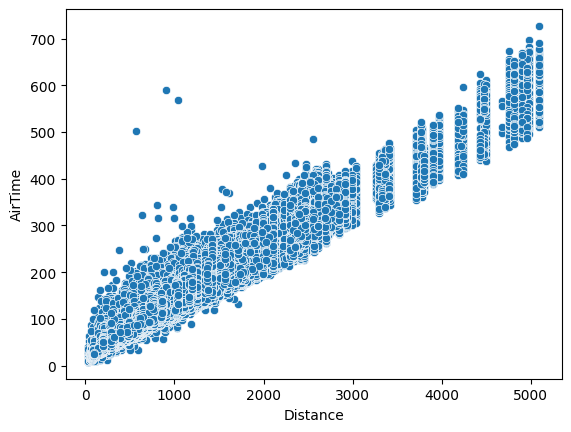

In [98]:
sns.scatterplot(data=data[~data["AirTime"].isna()],x="Distance",y="AirTime")

In [99]:
temp_data=data[~data["AirTime"].isna()]
X_train, X_test, y_train, y_test=train_test_split(temp_data["Distance"],temp_data["AirTime"],test_size=0.2)
lr=LinearRegression()
lr.fit(np.array(X_train).reshape(-1, 1),y_train)
y=lr.predict(np.array(X_test).reshape(-1, 1))
print(lr.score(np.array(X_test).reshape(-1, 1),y_test))


0.9711861241998833


In [102]:
index=data[data["AirTime"].isna()]["Distance"].index
y=lr.predict(np.array(data[data["AirTime"].isna()]["Distance"]).reshape(-1, 1))
data.loc[index,"AirTime"]=np.round(y,0)

In [104]:
data.isna().sum()

Unnamed: 0                   0
Quarter                      0
Month                        0
DayofMonth                   0
DayOfWeek                    0
FlightDate                   0
Marketing_Airline_Network    0
OriginCityName               0
DestCityName                 0
DepDelay                     0
ArrDelay                     0
Cancelled                    0
Diverted                     0
AirTime                      0
Distance                     0
CarrierDelay                 0
WeatherDelay                 0
NASDelay                     0
SecurityDelay                0
LateAircraftDelay            0
TotDelay                     0
dtype: int64

In [1]:
data["Marketing_Airline_Network"]

NameError: name 'data' is not defined

In [ ]:
data.drop(columns=["FlightDate"],inplace=True)

In [37]:
data.describe()

,Unnamed: 0,Quarter,Month,DayofMonth,DayOfWeek,DepDelay,ArrDelay,Cancelled,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotDelay
count,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06,6.806806e+06,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06,7.013508e+06
mean,3.506754e+06,2.516275e+00,6.547852e+00,1.573387e+01,3.982934e+00,1.215205e+01,6.758007e+00,2.709600e-02,2.375844e-03,1.106410e+02,7.969464e+02,5.440951e+00,7.774999e-01,2.320654e+00,2.817035e-02,5.209653e+00,3.268698e+01
std,2.024626e+06,1.106200e+00,3.406279e+00,8.783559e+00,2.001696e+00,5.229198e+01,5.399463e+01,1.623632e-01,4.868470e-02,6.982750e+01,5.918063e+02,3.557587e+01,1.417481e+01,1.385249e+01,1.642591e+00,2.740675e+01,1.559050e+02
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,-1.000000e+02,0.000000e+00,0.000000e+00,8.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.950000e+02
25%,1.753377e+06,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,-5.000000e+00,-1.400000e+01,0.000000e+00,0.000000e+00,6.000000e+01,3.680000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.900000e+01
50%,3.506754e+06,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,-1.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,9.300000e+01,6.410000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00
75%,5.260130e+06,3.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,9.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,1.400000e+02,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+01
max,7.013507e+06,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,7.223000e+03,7.232000e+03,1.000000e+00,1.000000e+00,7.270000e+02,5.095000e+03,7.232000e+03,2.363000e+03,1.740000e+03,1.245000e+03,2.302000e+03,2.168700e+04


<Axes: xlabel='TotDelay'>

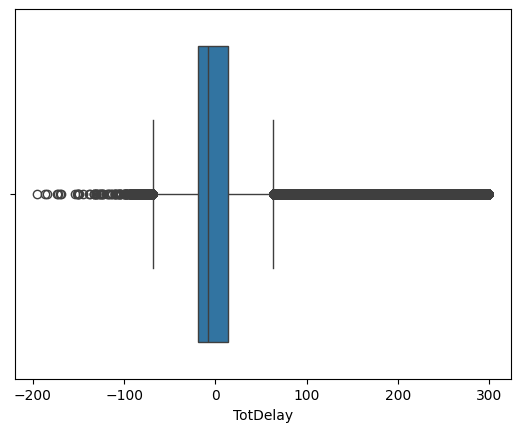

In [39]:
sns.boxplot(data=data[data["TotDelay"]<300],x="TotDelay")

In [40]:
lq=data["TotDelay"].quantile(0.25)
uq=data["TotDelay"].quantile(.75)
range=lq-uq
data[((data["TotDelay"]>=1.5*uq)|(data["TotDelay"]<=1.5*lq))].count()

Unnamed: 0                   2136701
Quarter                      2136701
Month                        2136701
DayofMonth                   2136701
DayOfWeek                    2136701
FlightDate                   2136701
Marketing_Airline_Network    2136701
OriginCityName               2136701
DestCityName                 2136701
DepDelay                     2136701
ArrDelay                     2136701
Cancelled                    2136701
Diverted                     2136701
AirTime                      2132510
Distance                     2136701
CarrierDelay                 2136701
WeatherDelay                 2136701
NASDelay                     2136701
SecurityDelay                2136701
LateAircraftDelay            2136701
TotDelay                     2136701
dtype: int64

<Axes: xlabel='TotDelay', ylabel='Count'>

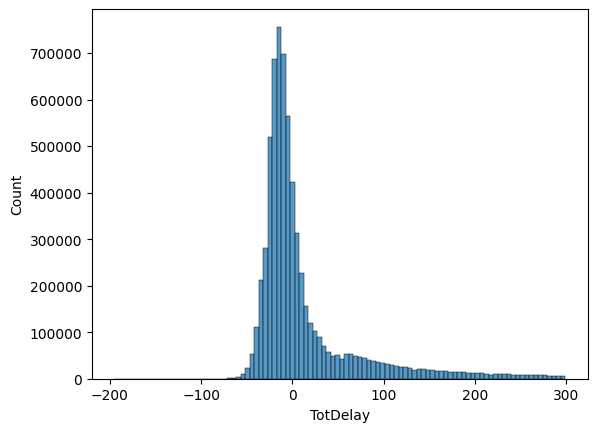

In [41]:
sns.histplot(data=data[data["TotDelay"]<300],x="TotDelay",bins=100)

In [48]:
data["TotDelay_TR"]=power_transform(X=data)

ValueError: could not convert string to float: '2022-01-06'

<Axes: xlabel='TotDelay'>

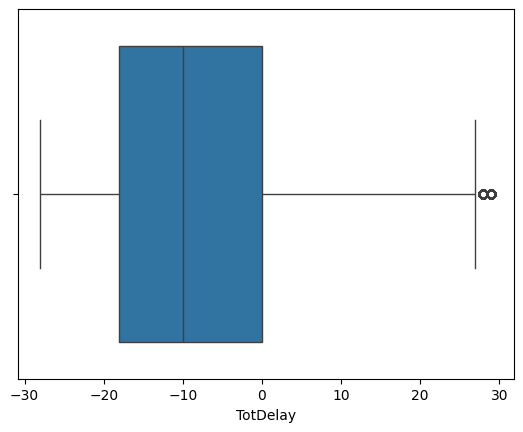

In [30]:
data.drop(data[((data["TotDelay"]>=1.5*uq)|(data["TotDelay"]<=1.5*lq))].index,inplace=True)
sns.boxplot(data=data[data["TotDelay"]<300],x="TotDelay")

In [31]:
data.isna().sum()

Unnamed: 0                       0
Quarter                          0
Month                            0
DayofMonth                       0
DayOfWeek                        0
FlightDate                       0
Marketing_Airline_Network        0
OriginCityName                   0
DestCityName                     0
DepDelay                         0
ArrDelay                         0
Cancelled                        0
Diverted                         0
AirTime                      12473
Distance                         0
CarrierDelay                     0
WeatherDelay                     0
NASDelay                         0
SecurityDelay                    0
LateAircraftDelay                0
TotDelay                         0
dtype: int64